# **Understanding Bias in Machine Learning**

**Bias** refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. High bias often indicates that the model is too simplistic to capture the underlying patterns in the data, leading to underfitting.

- **High Bias:** The model is too simple and fails to capture the underlying trends in the data, resulting in systematic errors and poor performance on both training and test data.

### **Impact of Adding More Features**

Adding more features or increasing the model complexity can help address high bias by allowing the model to better capture the underlying relationships in the data. Here’s why:

1. **Increased Model Capacity:** 

   - **Degree of Polynomial Models:** For example, in polynomial regression, moving from a linear model (degree 1) to a quadratic model (degree 2) increases the model's capacity to fit more complex relationships. A linear model might not capture non-linear patterns in the data, but a quadratic model can fit curves and thus better capture the underlying data structure.

   - **Feature Engineering:** Adding features such as interactions or polynomial terms (e.g., \( x^2 \) or \( x_1 \times x_2 \)) can allow the model to capture more complex relationships and interactions between variables.

2. **Better Fit to Data:**

   - **Model Complexity:** A more complex model (e.g., a polynomial regression of higher degree) can fit the data more closely, reducing the error that results from underfitting. It essentially allows the model to fit the training data better by adding the capacity to capture additional patterns.


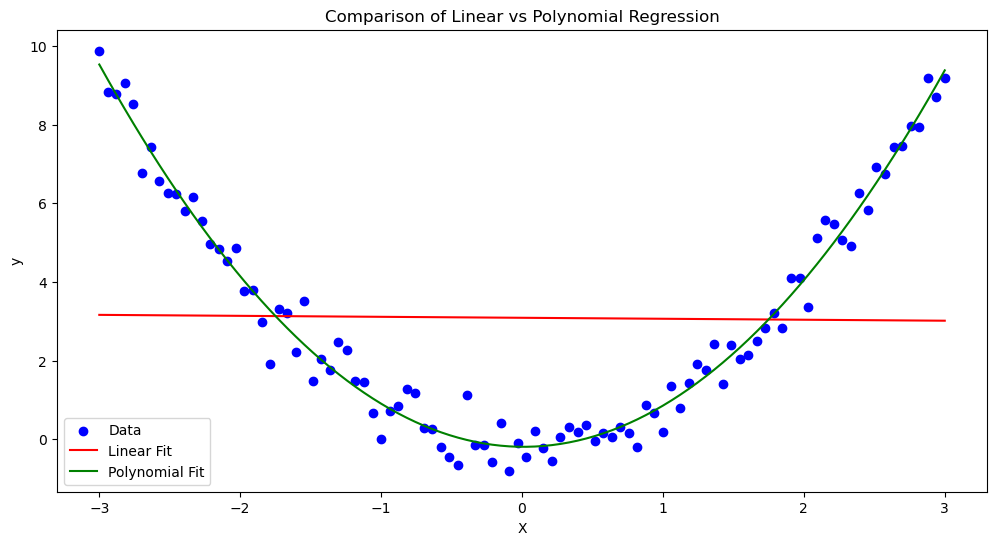

In [19]:
##Polynomial Regression to understand _ High Bias in the Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generating sample data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**2 + np.random.randn(100, 1) * 0.5

# Fit linear model (degree 1)
model_linear = LinearRegression()
model_linear.fit(X, y)
y_pred_linear = model_linear.predict(X)

# Fit polynomial model (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)

# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_linear, color='red', label='Linear Fit')
plt.plot(X, y_pred_poly, color='green', label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Linear vs Polynomial Regression')
plt.legend()
plt.show()


Linear Fit (Degree 1): The red line represents a simple linear fit which may not capture the underlying quadratic pattern in the data.
Polynomial Fit (Degree 2): The green line represents a quadratic fit which captures the curvature of the data more effectively.

In [20]:
# Mean Squared Error (MSE): By comparing the MSE for both models, you can see if the polynomial model reduces bias (i.e., fits the training data better).
print("MSE Linear Model:", mean_squared_error(y, y_pred_linear))
print("MSE Polynomial Model:", mean_squared_error(y, y_pred_poly))

MSE Linear Model: 8.821634409332573
MSE Polynomial Model: 0.21330119980005757


Thus, By carefully increasing model complexity and evaluating its impact, you can effectively address high bias and improve model performance.

# Gradient Descent: Simple implementation of Gradient Descent for linear regression in Python

In [17]:

import numpy as np

# Sample Data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])  # Features
y = np.array([6, 8, 9, 11])  # Target

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000
m = len(y)  # Number of training examples

# Initialize Parameters
theta = np.zeros(X.shape[1])

# Gradient Descent Algorithm
for _ in range(num_iterations):
    # Compute Predictions
    predictions = X.dot(theta)
    
    # Compute Gradient
    gradient = (1/m) * X.T.dot(predictions - y)
    
    # Update Parameters
    theta = theta - learning_rate * gradient

print("Optimized Parameters:", theta)


Optimized Parameters: [2.04054768 2.58265021]


### **Gradient Descent Algorithm Explanation**

**Gradient Descent** is an optimization algorithm used to minimize a cost function by iteratively moving towards the direction of the steepest descent (i.e., the negative gradient).

#### **Steps of Gradient Descent**

1. **Initialize Parameters:**
   - Start with initial guesses for the model parameters \( \theta \).

2. **Compute the Gradient:**
   - Calculate the gradient (or partial derivatives) of the cost function with respect to each parameter. The gradient points in the direction of the steepest increase of the cost function.

3. **Update Parameters:**
   - Adjust the parameters in the direction opposite to the gradient to reduce the cost function. The size of the step is controlled by the learning rate \( \alpha \).

4. **Repeat:**
   - Continue the process until the cost function converges to a minimum value or a specified number of iterations is reached.

### **Live Example**

Let's demonstrate Gradient Descent with a simple example using Python. We will use the following quadratic cost function:

\[ J(\theta) = \theta^2 + 4\theta + 4 \]

This function has a minimum at \( \theta = -2 \). We'll use gradient descent to find this minimum and visualize the process.

## Output
Running the below code will produce two plots:

### Cost Function and Gradient Descent Path:
This plot shows the quadratic cost function and the path of gradient descent (red dots) moving towards the minimum.

###  Cost History Over Iterations:
This plot illustrates how the cost function value decreases with each iteration, showing the convergence of the algorithm.
These plots will help visualize how gradient descent iteratively approaches the minimum of the cost function.

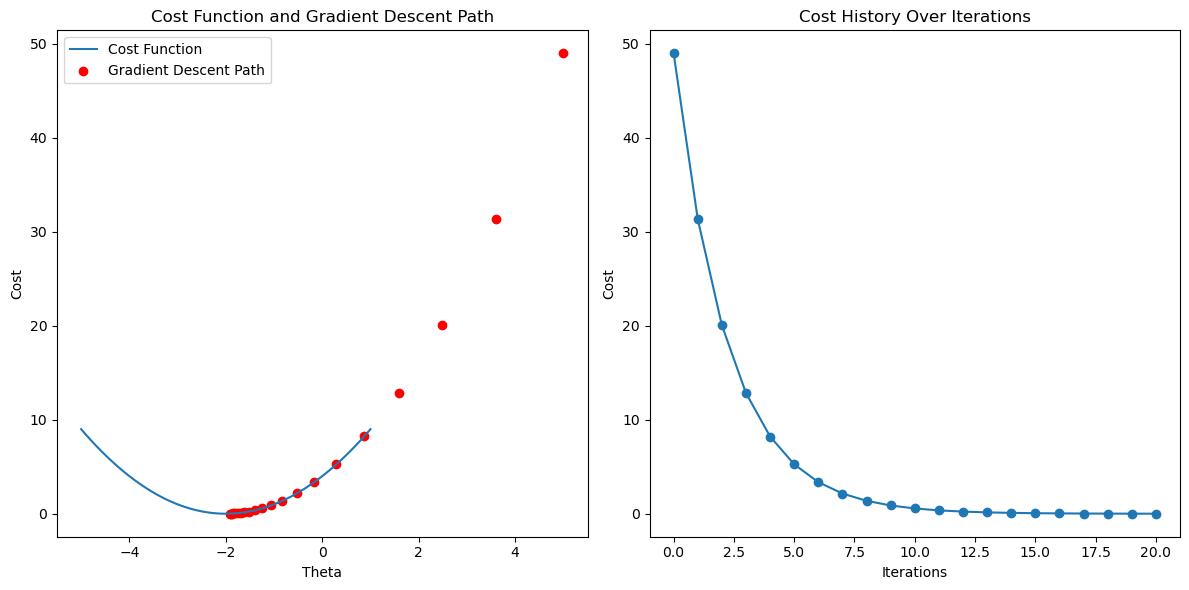

In [18]:
##Simple Gradient Descent Graphical Represenation Steps:
# 1. Define the cost function and its gradient.
# 2. Implement the gradient descent algorithm.
# 3. Plot the cost function and the path taken by gradient descent.
    
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function and its gradient
def cost_function(theta):
    return theta**2 + 4*theta + 4

def gradient(theta):
    return 2*theta + 4

# Gradient Descent parameters
learning_rate = 0.1
num_iterations = 20
theta_initial = 5  # Initial guess

# Initialize
theta = theta_initial
theta_history = [theta]
cost_history = [cost_function(theta)]

# Gradient Descent Algorithm
for _ in range(num_iterations):
    grad = gradient(theta)
    theta = theta - learning_rate * grad
    theta_history.append(theta)
    cost_history.append(cost_function(theta))

# Generate theta values for plotting the cost function
theta_values = np.linspace(-5, 1, 100)
cost_values = cost_function(theta_values)

# Plotting
plt.figure(figsize=(12, 6))

# Plot cost function
plt.subplot(1, 2, 1)
plt.plot(theta_values, cost_values, label='Cost Function')
plt.scatter(theta_history, cost_history, color='red', label='Gradient Descent Path')
plt.xlabel('Theta')
plt.ylabel('Cost')
plt.title('Cost Function and Gradient Descent Path')
plt.legend()

# Plot cost history
plt.subplot(1, 2, 2)
plt.plot(range(num_iterations + 1), cost_history, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History Over Iterations')

plt.tight_layout()
plt.show()


### **Explanation of the Code**

1. **Cost Function and Gradient Definition:**
   - **`cost_function(theta)`**: Represents \( \theta^2 + 4\theta + 4 \).
   - **`gradient(theta)`**: Represents the derivative \( 2\theta + 4 \).

2. **Gradient Descent Algorithm:**
   - **Initialization:** Start with an initial guess for \( \theta \) and record the initial cost.
   - **Iteration:** In each iteration, compute the gradient, update \( \theta \) using the learning rate, and record the new cost.

3. **Plotting:**
   - **Cost Function Plot:** Shows the quadratic cost function and the path taken by gradient descent (red dots) as it converges to the minimum.
   - **Cost History Plot:** Shows how the cost decreases with each iteration, indicating the convergence of the algorithm.

### **Summary**

- **Gradient Descent:** An optimization algorithm used to minimize a cost function by iteratively updating parameters in the direction opposite to the gradient.
- **Implementation:** The provided code demonstrates a simple quadratic function and visualizes how gradient descent converges to the minimum.
- **Visualization:** The plots help to understand how the algorithm progresses and converges.

This example provides a clear illustration of how gradient descent operates and how you can visualize its effectiveness in minimizing a cost function.

# Grid Search with Scikit-Learn

**Grid Search** is a hyperparameter tuning technique used to optimize machine learning models by systematically evaluating a predefined set of hyperparameters. It helps to find the best combination of hyperparameters that improves model performance.

### **What is Grid Search?**

- **Definition:** Grid Search is a method for hyperparameter optimization where you specify a grid of hyperparameter values and the algorithm evaluates all possible combinations to find the optimal set. This exhaustive search over the grid helps in identifying the best parameters for the model.

- **Purpose:** The goal of Grid Search is to find the hyperparameters that yield the best performance for a given machine learning model. Hyperparameters are parameters that are not learned from the data but are set before training (e.g., learning rate, number of trees in a forest).

### **Where and Why We Use Grid Search in ML Models**

1. **Model Tuning:**
   - **Purpose:** To improve model performance by finding the optimal hyperparameters. Different hyperparameters can significantly affect how well a model performs.
   - **Usage:** Grid Search is used for models such as support vector machines, decision trees, random forests, and neural networks, where choosing the right hyperparameters is crucial for achieving the best performance.

2. **Automation:**
   - **Purpose:** To automate the process of hyperparameter tuning, making it systematic and less prone to manual errors.
   - **Usage:** It systematically searches through a predefined grid of hyperparameters, making it easier to find the best combination.

3. **Cross-Validation:**
   - **Purpose:** To use cross-validation in conjunction with Grid Search to ensure that the model is validated properly and not overfitting to a particular subset of the data.
   - **Usage:** Grid Search can be combined with k-fold cross-validation to assess the performance of each combination of hyperparameters on different subsets of the data.

### **Live Example: Grid Search with Scikit-Learn**

Let’s use Grid Search to tune the hyperparameters of a `RandomForestClassifier` on a sample dataset. We'll use the Iris dataset for this example.

**Steps:**

1. **Import Libraries:**
2. **Load Dataset:**
3. **Define Model and Parameter Grid:**
4. **Perform Grid Search:**
5. **Evaluate Results:**

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}
Best Score: 0.9523809523809523

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### **Explanation:**

1. **Import Libraries:** Import necessary libraries for data handling, model training, and evaluation.
   
2. **Load Dataset:** The Iris dataset is loaded and split into training and testing sets.

3. **Define Model and Parameter Grid:**
   - **Model:** We use `RandomForestClassifier` as the model.
   - **Parameter Grid:** We define a grid of hyperparameters to search through. This includes variations in the number of estimators, maximum depth, minimum samples for splitting, and minimum samples for leaves.

4. **Perform Grid Search:**
   - **Grid Search Setup:** `GridSearchCV` is configured with the model, parameter grid, cross-validation strategy (5-fold), and evaluation metric (accuracy).
   - **Fit Grid Search:** Grid Search is performed on the training data, evaluating all combinations of hyperparameters.

5. **Evaluate Results:**
   - **Best Parameters and Score:** After fitting, the best hyperparameter combination and its performance score are retrieved.
   - **Test Set Evaluation:** The best model is evaluated on the test set, and a classification report is printed to assess performance.

### **Summary**

- **Grid Search:** A technique to systematically search for the best hyperparameter combination by evaluating all specified options.
- **Usage:** Applied during model tuning to improve performance by finding the optimal hyperparameters.
- **Benefits:** Automation, systematic search, and integration with cross-validation.

Grid Search helps in optimizing models effectively, leading to better performance and more reliable results in machine learning applications.

# **Gain Chart** and **Decile Chart**
**Gain Chart** and **Decile Chart** are useful tools in evaluating the performance of classification models, especially for binary classification problems. They help in understanding how well a model performs in terms of capturing positive cases compared to random chance.

### **Gain Chart**

**Definition:**
- A Gain Chart (or Gain Curve) is a graphical representation that shows the performance of a classification model compared to a random model. It illustrates how much better the model is at capturing positive instances compared to a random guess.

**Purpose:**
- To visualize the improvement of the model's performance over random guessing.
- To assess how well the model ranks the positive instances.

**How to Create:**
1. **Calculate the Cumulative Gain:**
   - Rank the predicted probabilities in descending order.
   - Calculate the cumulative number of true positives for each percentile of the population (e.g., top 10%, top 20%, etc.).
   - Plot these cumulative gains against the percentage of the population.

2. **Plot the Gain Chart:**
   - The x-axis represents the percentage of the population (e.g., deciles or percentiles).
   - The y-axis represents the cumulative gain (or the cumulative number of positive instances).

### **Decile Chart**

**Definition:**
- A Decile Chart (or Decile Lift Chart) is a variation of the Gain Chart that splits the data into deciles based on predicted probabilities and shows the performance of the model in each decile.

**Purpose:**
- To evaluate how well the model performs in each decile.
- To understand how the model’s predictive power varies across different segments of the data.

**How to Create:**
1. **Split Data into Deciles:**
   - Rank the predicted probabilities in descending order.
   - Divide the ranked data into ten equal parts (deciles).

2. **Calculate Performance Metrics:**
   - For each decile, calculate the percentage of true positives, or other metrics like lift or gain.

3. **Plot the Decile Chart:**
   - The x-axis represents the deciles.
   - The y-axis represents the performance metric (e.g., true positive rate).

### **Live Example**

Let’s derive Gain and Decile Charts using Python. We’ll use the `GridSearchCV` output from the previous example and compute these charts for the best model.

**Steps:**

1. **Fit Grid Search and Obtain Best Model**
2. **Calculate Predicted Probabilities**
3. **Generate Gain and Decile Charts**

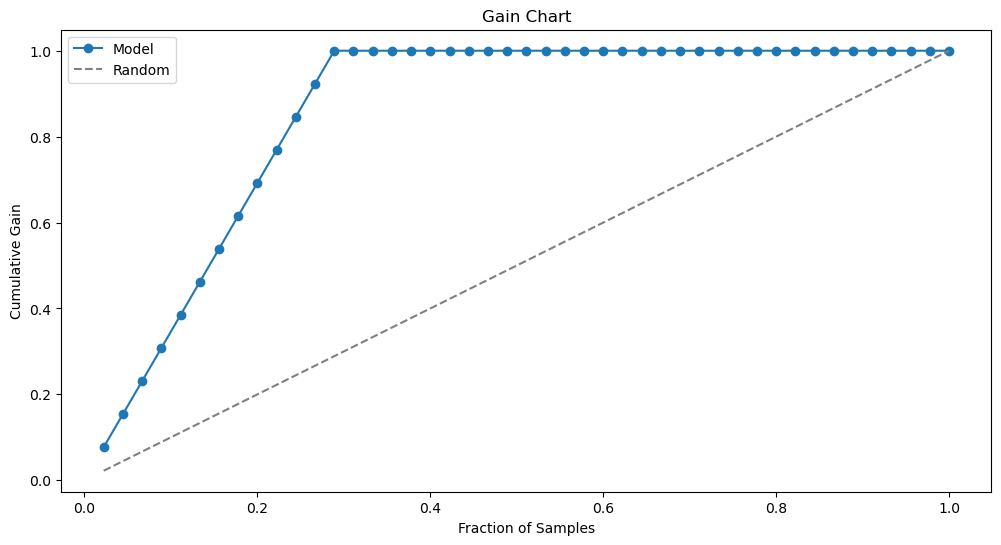

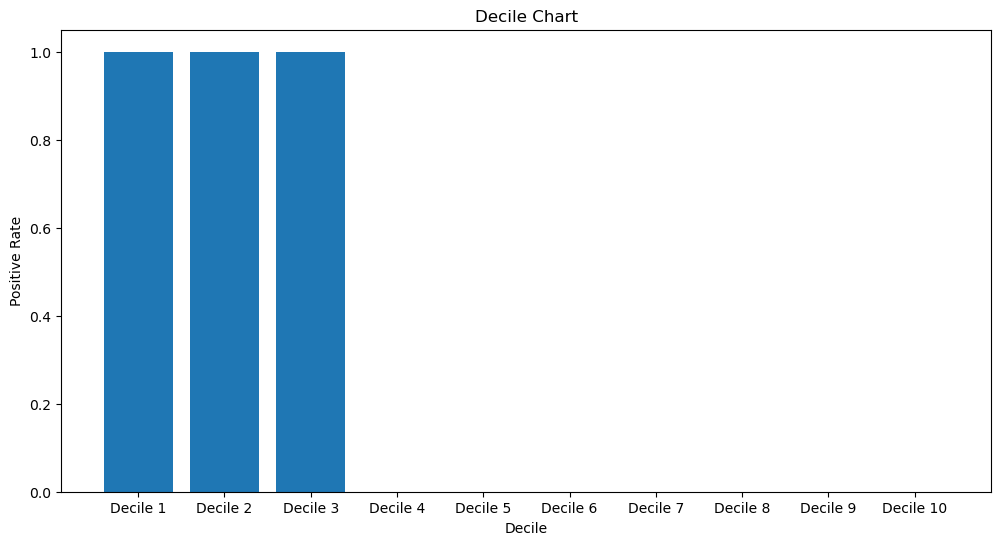

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

# Load dataset and split
iris = load_iris()
X = iris.data
y = iris.target
y_binary = (y == 1).astype(int)  # Convert to binary classification (class 1 vs. others)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Define model and parameter grid
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Predict probabilities
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Gain Chart
def plot_gain_chart(y_true, y_probs):
    # Sort by probabilities
    data = np.vstack([y_true, y_probs]).T
    data_sorted = data[data[:, 1].argsort()[::-1]]
    y_true_sorted = data_sorted[:, 0]
    
    # Calculate cumulative gains
    cumulative_gains = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
    x = np.arange(1, len(y_true_sorted) + 1) / len(y_true_sorted)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, cumulative_gains, marker='o', label='Model')
    plt.plot(x, x, linestyle='--', color='gray', label='Random')
    plt.xlabel('Fraction of Samples')
    plt.ylabel('Cumulative Gain')
    plt.title('Gain Chart')
    plt.legend()
    plt.show()

# Decile Chart
def plot_decile_chart(y_true, y_probs):
    # Sort by probabilities and split into deciles
    data = np.vstack([y_true, y_probs]).T
    data_sorted = data[data[:, 1].argsort()[::-1]]
    y_true_sorted = data_sorted[:, 0]
    
    # Calculate performance metrics per decile
    num_deciles = 10
    decile_boundaries = np.linspace(0, len(y_true_sorted), num_deciles + 1).astype(int)
    decile_performance = [np.mean(y_true_sorted[decile_boundaries[i]:decile_boundaries[i + 1]]) for i in range(num_deciles)]
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(1, num_deciles + 1), decile_performance, tick_label=[f'Decile {i + 1}' for i in range(num_deciles)])
    plt.xlabel('Decile')
    plt.ylabel('Positive Rate')
    plt.title('Decile Chart')
    plt.show()

# Generate and plot charts
plot_gain_chart(y_test, y_probs)
plot_decile_chart(y_test, y_probs)

### **Explanation of the Code:**

1. **Fit Grid Search and Obtain Best Model:**
   - Perform Grid Search to find the best RandomForest model and predict probabilities on the test set.

2. **Calculate Predicted Probabilities:**
   - Obtain the predicted probabilities for the positive class from the best model.

3. **Generate Gain and Decile Charts:**
   - **Gain Chart:** Compute and plot cumulative gains by sorting predictions and comparing them to random guessing.
   - **Decile Chart:** Divide the sorted predictions into deciles and calculate performance metrics for each decile.

### **Summary**

- **Gain Chart:** Shows how much better the model performs compared to random guessing by plotting cumulative gains.
- **Decile Chart:** Displays model performance across deciles, illustrating how well the model ranks positive instances.

These charts are valuable for evaluating and understanding the effectiveness of classification models in real-world scenarios.

# **Confusion Matrix**

**Definition:**
- A **Confusion Matrix** is a table used to evaluate the performance of a classification model. It summarizes the prediction results by comparing the predicted labels with the true labels. It provides insights into how many instances were correctly or incorrectly classified by the model.

**Components:**
- **True Positive (TP):** The number of instances correctly predicted as positive.
- **True Negative (TN):** The number of instances correctly predicted as negative.
- **False Positive (FP):** The number of instances incorrectly predicted as positive (Type I error).
- **False Negative (FN):** The number of instances incorrectly predicted as negative (Type II error).

**Purpose:**
- To assess the performance of a classification model by providing metrics like accuracy, precision, recall, and F1-score.

**Matrix Layout:**

|                  | Predicted Positive | Predicted Negative |
|------------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP) | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

### **Example Calculation Using Grid Search**

Let's calculate the Confusion Matrix for the best model obtained from Grid Search on the Iris dataset. We’ll follow these steps:

1. **Fit Grid Search and Obtain Best Model**
2. **Predict Labels**
3. **Calculate Confusion Matrix**


<Figure size 800x600 with 0 Axes>

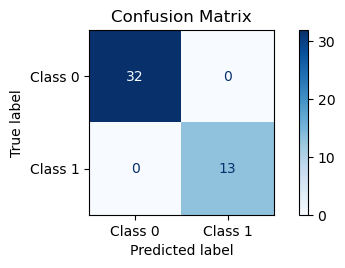


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load dataset and split
iris = load_iris()
X = iris.data
y = iris.target
y_binary = (y == 1).astype(int)  # Convert to binary classification (class 1 vs. others)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Define model and parameter grid
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Predict labels
y_pred = best_rf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


### **Explanation of the Code:**

1. **Fit Grid Search and Obtain Best Model:**
   - We perform Grid Search to find the best hyperparameters for the RandomForest model and then use the best model to make predictions on the test set.

2. **Predict Labels:**
   - Using the best model, we predict the labels for the test data.

3. **Calculate Confusion Matrix:**
   - We compute the confusion matrix using `confusion_matrix()` and display it using `ConfusionMatrixDisplay`.

4. **Plot Confusion Matrix:**
   - The confusion matrix is visualized using a heatmap where:
     - The x-axis represents predicted labels.
     - The y-axis represents true labels.
     - Each cell in the matrix represents the count of instances for the corresponding true and predicted label combination.

5. **Print Classification Report:**
   - Provides additional performance metrics including precision, recall, and F1-score for a comprehensive evaluation of the model.

### **Summary**

- **Confusion Matrix:** Provides a detailed breakdown of correct and incorrect classifications, essential for evaluating model performance.
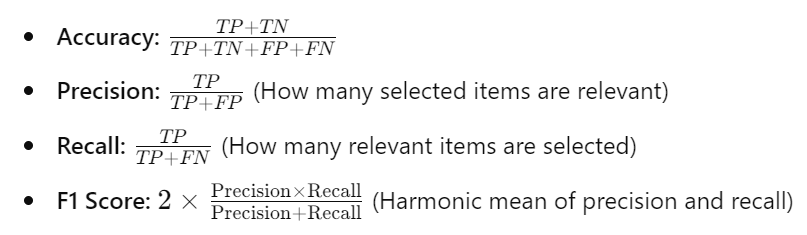
                                                                                              
- **Gain Chart:** Shows how well the model captures positive instances compared to random guessing.
- **Decile Chart:** Evaluates model performance across different segments (deciles) based on predicted probabilities.

These tools and charts are vital for understanding and interpreting the performance of classification models, especially in real-world applications.


# **Kolmogorov-Smirnov (KS) score** 
**KS score** is a measure used to evaluate the performance of classification models. It quantifies the separation between the cumulative distributions of the positive and negative class predictions.

### **KS Score Overview**

**Definition:**
- The KS score measures the maximum difference between the cumulative distribution functions (CDFs) of the positive and negative classes. It indicates how well the model distinguishes between positive and negative instances.

**Purpose:**
- To assess the discriminatory power of a classification model. Higher KS scores suggest better model performance in distinguishing between classes.

**Formula:**
- \( \text{KS Score} = \max \left( \text{CDF}_{\text{positive}}(x) - \text{CDF}_{\text{negative}}(x) \right) \)

### **Steps to Create a Decile-wise KS Score Table**

1. **Calculate Deciles:**
   - Split the data into deciles based on the predicted probabilities.

2. **Compute Cumulative Distributions:**
   - For each decile, calculate the cumulative distribution of positive and negative instances.

3. **Calculate KS Scores:**
   - Compute the KS score for each decile by finding the maximum difference between the cumulative distributions of the positive and negative classes.

4. **Create and Display the Table:**
   - Present the decile-wise KS scores in a table format.

### **Code Example**

Below is the code to compute the KS score for each decile using the previously obtained `y_probs` and `y_test`. We’ll split the data into deciles based on predicted probabilities and calculate the KS score for each decile.


In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load dataset and split
iris = load_iris()
X = iris.data
y = iris.target
y_binary = (y == 1).astype(int)  # Convert to binary classification (class 1 vs. others)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Define model and parameter grid
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Predict probabilities
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_true = y_test

# Create DataFrame with true labels and predicted probabilities
df = pd.DataFrame({'TrueLabel': y_true, 'Probability': y_probs})

# Sort by predicted probabilities in descending order
df = df.sort_values(by='Probability', ascending=False).reset_index(drop=True)

# Calculate decile boundaries
num_deciles = 10
decile_boundaries = np.linspace(0, len(df), num_deciles + 1).astype(int)
df['Decile'] = np.digitize(df.index, bins=decile_boundaries, right=True)

# Calculate cumulative distributions for positive and negative classes
ks_scores = []
for i in range(1, num_deciles + 1):
    decile_data = df[df['Decile'] == i]
    pos_rate = np.sum(decile_data['TrueLabel']) / len(decile_data)
    neg_rate = 1 - pos_rate
    cumulative_pos_rate = np.sum(df[df['Decile'] <= i]['TrueLabel']) / np.sum(df['TrueLabel'])
    cumulative_neg_rate = 1 - (np.sum(df[df['Decile'] <= i]['TrueLabel']) / len(df[df['Decile'] <= i]))
    ks_score = cumulative_pos_rate - cumulative_neg_rate
    ks_scores.append(ks_score)

# Create KS score table
ks_df = pd.DataFrame({
    'Decile': range(1, num_deciles + 1),
    'KS Score': ks_scores
})

print("Decile-wise KS Score Table:")
print(ks_df)


Decile-wise KS Score Table:
   Decile  KS Score
0       1  0.384615
1       2  0.769231
2       3  0.928571
3       4  0.684211
4       5  0.565217
5       6  0.464286
6       7  0.406250
7       8  0.351351
8       9  0.317073
9      10  0.288889


### **KS Score - Summary**

- **KS Score:** Measures the model's ability to distinguish between classes by comparing cumulative distributions.
- **Decile-wise KS Score Table:** Shows how the KS score varies across different deciles, providing insight into model performance at different probability thresholds.

This approach helps in understanding the discriminatory power of the model across different segments of the predicted probabilities.

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Load dataset and split
iris = load_iris()
X = iris.data
y = iris.target
y_binary = (y == 1).astype(int)  # Convert to binary classification (class 1 vs. others)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Define model and parameter grid
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Predict probabilities
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_true = y_test

# Create DataFrame with true labels and predicted probabilities
df = pd.DataFrame({'TrueLabel': y_true, 'Probability': y_probs})

# Sort by predicted probabilities in descending order
df = df.sort_values(by='Probability', ascending=False).reset_index(drop=True)

# Calculate decile boundaries
num_deciles = 10
decile_boundaries = np.linspace(0, len(df), num_deciles + 1).astype(int)
df['Decile'] = np.digitize(df.index, bins=decile_boundaries, right=True)

# Initialize lists to store values
decile_data = []
cumulative_positive = 0
cumulative_negative = 0
total_positives = np.sum(df['TrueLabel'])
total_negatives = len(df) - total_positives

# Calculate metrics for each decile
for i in range(1, num_deciles + 1):
    decile_subset = df[df['Decile'] == i]
    num_instances = len(decile_subset)
    num_positives = np.sum(decile_subset['TrueLabel'])
    num_negatives = num_instances - num_positives
    
    cumulative_positive += num_positives
    cumulative_negative += num_negatives
    
    cumulative_positive_rate = cumulative_positive / total_positives
    cumulative_negative_rate = cumulative_negative / total_negatives
    
    ks_score = cumulative_positive_rate - cumulative_negative_rate
    
    decile_data.append({
        'Decile': i,
        'Number of Instances': num_instances,
        'Positive Instances': num_positives,
        'Negative Instances': num_negatives,
        'Cumulative Positive Rate': cumulative_positive_rate,
        'Cumulative Negative Rate': cumulative_negative_rate,
        'KS Score': ks_score
    })

# Create DataFrame for the KS table
ks_df = pd.DataFrame(decile_data)

# Format the DataFrame for better readability
ks_df['Number of Instances'] = ks_df['Number of Instances'].apply(lambda x: f"{x:,}")
ks_df['Positive Instances'] = ks_df['Positive Instances'].apply(lambda x: f"{x:,}")
ks_df['Negative Instances'] = ks_df['Negative Instances'].apply(lambda x: f"{x:,}")
ks_df['Cumulative Positive Rate'] = ks_df['Cumulative Positive Rate'].apply(lambda x: f"{x:.2%}")
ks_df['Cumulative Negative Rate'] = ks_df['Cumulative Negative Rate'].apply(lambda x: f"{x:.2%}")
ks_df['KS Score'] = ks_df['KS Score'].apply(lambda x: f"{x:.2%}")


In [42]:
# Create DataFrame for the KS table
ks_df = pd.DataFrame(decile_data)

print("Full KS Table:")
print(ks_df)

Full KS Table:
   Decile  Number of Instances  Positive Instances  Negative Instances  \
0       1                    4                   4                   0   
1       2                    5                   5                   0   
2       3                    4                   3                   1   
3       4                    5                   0                   5   
4       5                    4                   0                   4   
5       6                    5                   0                   5   
6       7                    4                   0                   4   
7       8                    5                   0                   5   
8       9                    4                   0                   4   
9      10                    4                   0                   4   

   Cumulative Positive Rate  Cumulative Negative Rate  KS Score  
0                  0.307692                   0.00000  0.307692  
1                  0.692308           

### **Explanation of the Code:**

1. **Load and Split Data:**
   - Load the Iris dataset, convert it to a binary classification problem, and split into training and test sets.

2. **Fit Grid Search and Predict Probabilities:**
   - Perform Grid Search to find the best model and predict probabilities for the test set.

3. **Create DataFrame:**
   - Create and sort a DataFrame with true labels and predicted probabilities.

4. **Calculate Deciles:**
   - Divide the data into deciles based on predicted probabilities.

5. **Compute Metrics:**
   - For each decile, calculate the number of instances, positive instances, negative instances, cumulative positive rate, cumulative negative rate, and KS score.
   - Track cumulative counts of positives and negatives to compute cumulative rates.

6. **Create and Print KS Table:**
   - Compile the metrics into a DataFrame and print the table.

### **Summary of KS Table Columns:**

- **Decile**: The decile index (1 to 10).
- **Number of Instances**: Total number of instances in the decile.
- **Positive Instances**: Count of positive instances in the decile.
- **Negative Instances**: Count of negative instances in the decile.
- **Cumulative Positive Rate**: Proportion of positive instances up to and including the current decile.
- **Cumulative Negative Rate**: Proportion of negative instances up to and including the current decile.
- **KS Score**: The difference between cumulative positive rate and cumulative negative rate.

This detailed KS table provides a comprehensive view of the model's performance across different probability thresholds and helps in assessing which decile yields the best separation between positive and negative classes.
